In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from itertools import product
from collections import Counter
from datetime import datetime
import seaborn as sns

Removing Nan's

In [2]:
stack_questions = pd.read_csv('StackOverflowQuestions.csv')
stack_questions_clean = pd.DataFrame
stack_questions_clean=stack_questions.dropna(how='any')#Getting rid of Nan lines

A function that will transform a string with tags into a list

In [3]:
def tags_extraction(tags_extracted):
    tags_extracted=tags_extracted.replace("[","")
    tags_extracted=tags_extracted.replace("]","")
    tags_extracted=tags_extracted.replace("'","")
    tags_extracted=tags_extracted.replace(" ","")
    tags_list=tags_extracted.split(',')
    return (tags_list)  


Extracting a full list of tags from dataframe

In [4]:
rows=stack_questions_clean.shape[0]
stack_questions_clean['tags_temp']=stack_questions_clean['tags']
for row in range(0, rows):
    tags_str=stack_questions_clean.loc[row, 'tags_temp']
    list_temp=tags_extraction(tags_str)
    stack_questions_clean.at[row, 'tags']=list_temp
del stack_questions_clean['tags_temp']

Gaining information about how often different tags are used and how often differnt combinations of tags are used together in pairs 

In [5]:
counter_single=Counter()
counter_pair=Counter()
for row in stack_questions_clean['tags']:
    counter_single.update(Counter(combinations(row,1)))
    counter_pair.update(Counter(combinations(row,2)))
counter_single=counter_single.most_common(10)
counter_pair=counter_pair.most_common(10)

Transforming multy-leveled lists from counters into dictitionaries

In [6]:
tags_single={}
tags_pair={}
for index in range(0, 10):
    tags_single[counter_single[index][0][0]]=counter_single[index][1]
    tags_pair[counter_pair[index][0]]=counter_pair[index][1]

Building bar charts based on recieved results

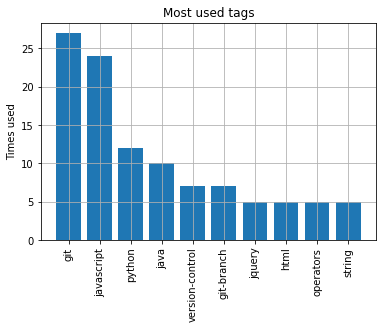

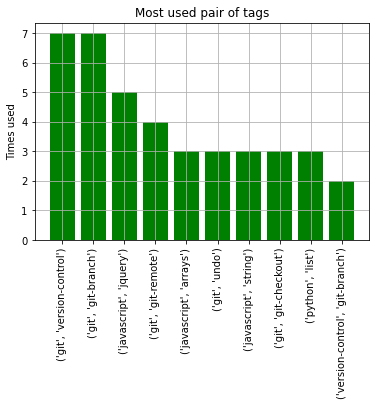

In [7]:
plt.figure('single')
plt.bar(range(len(tags_single)), list(tags_single.values()), align='center')
plt.xticks(range(len(tags_single)), list(tags_single.keys()), rotation = 'vertical')
plt.title("Most used tags")
plt.grid()
plt.ylabel("Times used")
plt.plot()
plt.figure('pair')
plt.bar(range(len(tags_pair)), list(tags_pair.values()), align='center', color ='green')
plt.xticks(range(len(tags_pair)), list(tags_pair.keys()), rotation = 'vertical')
plt.title("Most used pair of tags")
plt.grid()
plt.ylabel("Times used")
plt.plot()
plt.show()

Extracting hours and minutes from date - column

In [8]:
stack_questions_clean['date']=pd.to_datetime(stack_questions_clean['date'], format='%Y-%m-%d %H:%M:%S')
stack_questions_clean['hour']=stack_questions_clean['date'].dt.hour
stack_questions_clean['minute_temp']=stack_questions_clean['date'].dt.minute

Assigning minutes to 5 min intervals

In [9]:
stack_questions_clean.loc[(stack_questions_clean['minute_temp']<=5), 'minute']='00-05'
stack_questions_clean.loc[(stack_questions_clean['minute_temp']>5)&(stack_questions_clean['minute_temp']<=10), 'minute']='06-10'
stack_questions_clean.loc[(stack_questions_clean['minute_temp']>10)&(stack_questions_clean['minute_temp']<=15), 'minute']='11-15'
stack_questions_clean.loc[(stack_questions_clean['minute_temp']>15)&(stack_questions_clean['minute_temp']<=20), 'minute']='16-20'
stack_questions_clean.loc[(stack_questions_clean['minute_temp']>20)&(stack_questions_clean['minute_temp']<=25), 'minute']='21-25'
stack_questions_clean.loc[(stack_questions_clean['minute_temp']>25)&(stack_questions_clean['minute_temp']<=30), 'minute']='26-30'
stack_questions_clean.loc[(stack_questions_clean['minute_temp']>30)&(stack_questions_clean['minute_temp']<=35), 'minute']='31-35'
stack_questions_clean.loc[(stack_questions_clean['minute_temp']>35)&(stack_questions_clean['minute_temp']<=40), 'minute']='36-40'
stack_questions_clean.loc[(stack_questions_clean['minute_temp']>40)&(stack_questions_clean['minute_temp']<=45), 'minute']='41-45'
stack_questions_clean.loc[(stack_questions_clean['minute_temp']>45)&(stack_questions_clean['minute_temp']<=50), 'minute']='46-50'
stack_questions_clean.loc[(stack_questions_clean['minute_temp']>50)&(stack_questions_clean['minute_temp']<=55), 'minute']='51-55'
stack_questions_clean.loc[(stack_questions_clean['minute_temp']>55)&(stack_questions_clean['minute_temp']<=59), 'minute']='56-59'
del stack_questions_clean['minute_temp']

Counting how many questions are asked in which time interval

In [10]:
stack_questions_temp=pd.DataFrame()
stack_questions_temp['hour']=stack_questions_clean['hour']
stack_questions_temp['minute']=stack_questions_clean['minute']
stack_questions_table=pd.crosstab(stack_questions_temp['hour'], stack_questions_temp['minute'])

Drawing a graph

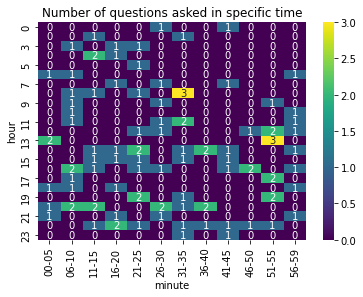

In [11]:
sns.heatmap(stack_questions_table, annot=True, fmt="g", cmap='viridis')
plt.title("Number of questions asked in specific time")
plt.show()